### Sample for DM end term exam 1 Problem 1

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [2]:
csv_in = 'dm-end1-1.csv'

#### biplot  function

In [3]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 3.
    r2 = 1.05
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.gca().set_aspect('equal', adjustable='box')
    
    return None

In [4]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(40, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jpn     40 non-null     int64
 1   Eng     40 non-null     int64
 2   Math    40 non-null     int64
 3   Phys    40 non-null     int64
 4   Chem    40 non-null     int64
dtypes: int64(5)
memory usage: 1.7 KB
None


,Jpn,Eng,Math,Phys,Chem
0,59,57,50,54,46
1,43,45,47,50,48
2,48,42,57,57,57
3,46,46,60,61,54
4,40,36,31,32,36


In [6]:
sc = StandardScaler()
X_std = sc.fit_transform(df)

In [7]:
n_pca = 5
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [8]:
print(X_pca.shape)
print(X_pca[:5])

(40, 5)
[[ 0.77824682  1.07233743 -0.61079973 -0.69629474  0.25602392]
 [-1.0325104  -1.01465555 -0.16039187  0.0982874   0.21967407]
 [ 0.59231526 -1.72395192  0.72275579 -0.25695821 -0.26244842]
 [ 0.96535162 -1.86983091 -0.14143834 -0.43522597 -0.21756003]
 [-4.47765589 -0.11781266  0.34941279  0.19302839  0.16273811]]


In [9]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.64671026 0.21353731 0.06909157 0.03560072 0.03506014]
[0.64671026 0.86024757 0.92933913 0.96493986 1.        ]


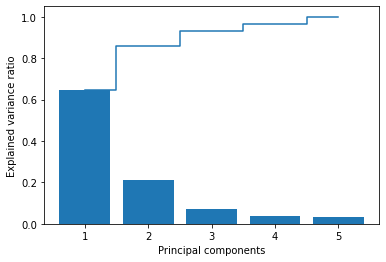

In [10]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

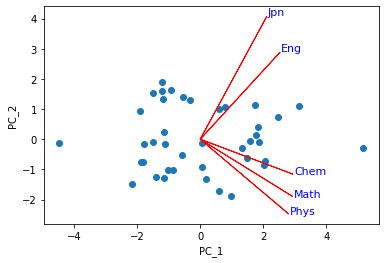

In [16]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 6
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=df.columns)